In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import pandas as pd
%matplotlib inline

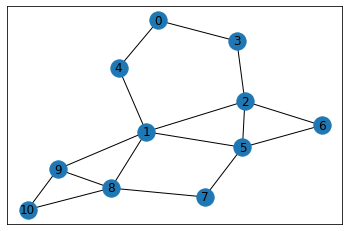

In [2]:
edges = [(0, 4), (4,0),(0,3),(3,0),(1,2),(2,1),(1,4),(4,1),(1,8),(8,1),(1,9),(9,1),(2,3),(3,2),(2,6),(6,2),(1,5),(5,1)
         ,(2,5),(5,2),(5,6),(6,5),(7,8),(8,7),(7,5),(5,7),(8,9),(9,8),(8,10),(10,8),(9,10),(10,9)]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

In [3]:
R = np.matrix(np.zeros(shape=(11,11)))
for x in G[10]:
    R[x,10] = 100

In [4]:
Q = np.matrix(np.zeros(shape=(11,11)))
Q -= 100
for node in G.nodes:
    for x in G[node]:
        Q[node, x] = 0
        Q[x, node] = 0

In [5]:
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [6]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,0.0,0.0,-100.0
2,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0


In [7]:
def next_number(start, threshold):
    random_value = random.uniform(0, 1)
    if random_value < threshold:
        sample = G[start]
    else:
        sample = np.where(Q[start,] == np.max(Q[start,]))[1]
    next_node = int(np.random.choice(sample, 1))
    return next_node

In [8]:
def updateQ(node1, node2, lr, discount):
    max_index = np.where(Q[node2,] == np.max(Q[node2,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[node2, max_index]
    Q[node1, node2] = int((1-lr)*Q[node1, node2] + lr*(R[node1, node2] + discount * max_value))

In [16]:
def learn(threshold, lr, discount):
    for i in range(50_000):
        start = np.random.randint(0,11)
        next_node = next_number(start, threshold)
        updateQ(start, next_node, lr, discount)
        Q /= (lambda x : np.max(x) if np.max(x) != 0 else 1)(Q)
        
learn(0.5, 0.8, 0.8)

UnboundLocalError: local variable 'Q' referenced before assignment

In [10]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.364964,-0.364964,-0.364964,0.401460,0.503650,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964
1,-0.364964,-0.364964,0.503650,-0.364964,0.503650,0.503650,-0.364964,-0.364964,0.795620,0.795620,-0.364964
2,-0.364964,0.635036,-0.364964,0.401460,-0.364964,0.503650,0.401460,-0.364964,-0.364964,-0.364964,-0.364964
3,0.401460,-0.364964,0.503650,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964
4,0.401460,0.635036,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964
5,-0.364964,0.635036,0.503650,-0.364964,-0.364964,-0.364964,0.401460,0.635036,-0.364964,-0.364964,-0.364964
6,-0.364964,-0.364964,0.503650,-0.364964,-0.364964,0.503650,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964
7,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,0.503650,-0.364964,-0.364964,0.795620,-0.364964,-0.364964
8,-0.364964,0.635036,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,0.635036,-0.364964,0.795620,1.000000
9,-0.364964,0.635036,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,-0.364964,0.795620,-0.364964,1.000000


In [11]:
def shortest_path(begin, end):
    path = [begin]
    next_node = np.argmax(Q[begin, ])
    path.append(next_node)
    while next_node != end:
        next_node = np.argmax(Q[next_node,])
        path.append(next_node); print(path)
    return path

In [12]:
shortest_path(0,10)

[0, 4, 1]
[0, 4, 1, 8]
[0, 4, 1, 8, 10]


[0, 4, 1, 8, 10]